In [8]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = 'Malgun Gothic')

In [4]:
from sklearn.datasets import make_blobs

In [12]:
blobs_x, blobs_y = make_blobs(n_samples = 500, centers = 5, shuffle = True, random_state = 0)

In [13]:
print(blobs_x.shape)
print(blobs_y.shape)

(500, 2)
(500,)


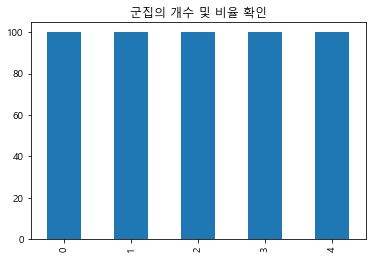

In [14]:
pd.value_counts(blobs_y).plot(kind = 'bar', title = '군집의 개수 및 비율 확인')
plt.show()

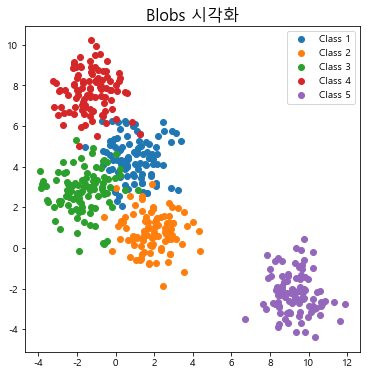

In [15]:
plt.figure(figsize = (6, 6))
plt.title('Blobs 시각화', fontsize = 16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0], blobs_x[blobs_y == c,1], label = 'Class {}'.format(c+1))
plt.legend()
plt.show()

## Two Moons

In [17]:
from sklearn.datasets import make_moons

In [18]:
moons_x, moons_y = make_moons(n_samples = 500, shuffle = True, noise = .05, random_state = 0)

print(moons_x.shape)
print(moons_y.shape)

(500, 2)
(500,)


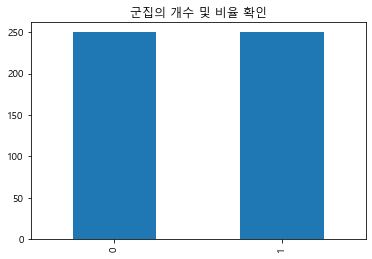

In [20]:
pd.value_counts(moons_y).plot(kind = 'bar', title = '군집의 개수 및 비율 확인')
plt.show()

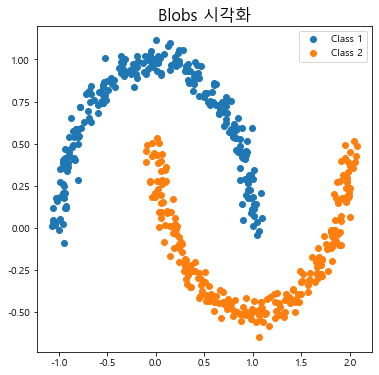

In [21]:
plt.figure(figsize = (6, 6))
plt.title('Blobs 시각화', fontsize = 16)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c,0], moons_x[moons_y == c,1], label = 'Class {}'.format(c+1))
plt.legend()
plt.show()

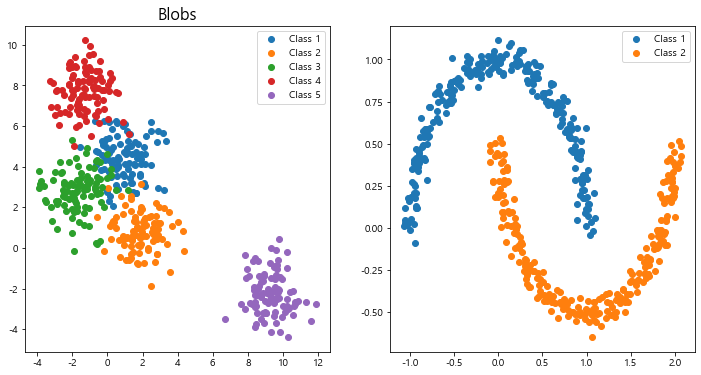

In [22]:
### Summary

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Blobs', fontsize = 16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0], blobs_x[blobs_y == c,1], label = 'Class {}'.format(c+1))
plt.legend()

plt.subplot(1, 2, 2)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c,0], moons_x[moons_y == c,1], label = 'Class {}'.format(c+1))
plt.legend()

plt.show()

In [23]:
# 모델 정의
model = AgglomerativeClustering(
linkage = 'complete',
affinity = 'euclidean',
distance_threshold = 5,
n_clusters = None)

# 학습
blobs_clusters = model.fit_predict(blobs_x)

In [24]:
blobs_clusters

array([4, 1, 1, 3, 1, 6, 1, 0, 4, 4, 2, 3, 1, 2, 5, 0, 1, 6, 1, 5, 4, 6,
       4, 3, 4, 2, 4, 7, 2, 3, 4, 1, 1, 2, 1, 4, 4, 6, 6, 0, 2, 0, 3, 4,
       1, 1, 6, 1, 7, 2, 1, 0, 4, 4, 6, 1, 0, 0, 2, 3, 7, 6, 4, 3, 1, 2,
       1, 2, 1, 3, 1, 4, 3, 0, 1, 1, 4, 4, 5, 4, 3, 2, 1, 1, 0, 7, 6, 1,
       1, 3, 5, 2, 2, 5, 0, 7, 4, 5, 2, 1, 4, 3, 2, 1, 1, 1, 0, 4, 4, 1,
       1, 3, 4, 0, 6, 2, 2, 2, 4, 6, 6, 3, 1, 2, 3, 1, 0, 5, 2, 2, 1, 4,
       1, 0, 2, 0, 0, 0, 1, 3, 4, 2, 4, 3, 4, 0, 0, 2, 5, 1, 1, 2, 2, 4,
       1, 2, 1, 1, 2, 3, 2, 0, 3, 1, 7, 4, 5, 7, 0, 4, 5, 1, 0, 6, 4, 2,
       1, 2, 1, 2, 1, 2, 2, 6, 5, 6, 4, 1, 2, 0, 2, 7, 0, 1, 7, 5, 1, 0,
       2, 2, 4, 2, 1, 2, 2, 4, 0, 1, 3, 1, 6, 2, 1, 2, 0, 2, 0, 4, 4, 1,
       4, 3, 0, 6, 0, 1, 3, 0, 6, 3, 4, 3, 2, 2, 2, 1, 2, 5, 0, 1, 7, 1,
       2, 6, 4, 4, 2, 2, 7, 0, 0, 1, 7, 7, 1, 1, 5, 1, 5, 2, 6, 3, 2, 4,
       1, 3, 6, 4, 5, 1, 1, 2, 3, 4, 2, 4, 2, 4, 2, 2, 3, 4, 4, 7, 1, 4,
       2, 1, 2, 0, 3, 1, 2, 1, 4, 0, 2, 5, 0, 2, 0,

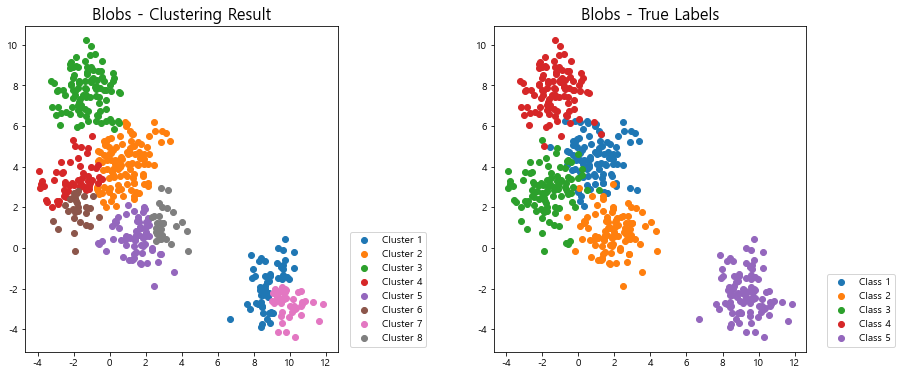

In [26]:
# 군집 형성 시각화
plt.figure(figsize = (14, 6))
plt.subplots_adjust(wspace = .5)

plt.subplot(1, 2, 1)
plt.title('Blobs - Clustering Result', fontsize = 16)
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c,0], blobs_x[blobs_clusters == c,1], label ='Cluster {}'.format(c+1))
plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Blobs - True Labels', fontsize = 16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0], blobs_x[blobs_y == c,1], label = 'Class {}'.format(c+1))
plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))
plt.show()

### Dendrogram 그리기

In [27]:
linkage_matrix = linkage(blobs_x, method = 'complete', metric = 'euclidean')

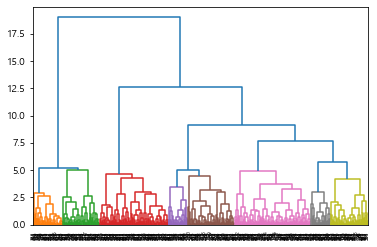

In [28]:
_ = dendrogram(linkage_matrix, color_threshold = 5)

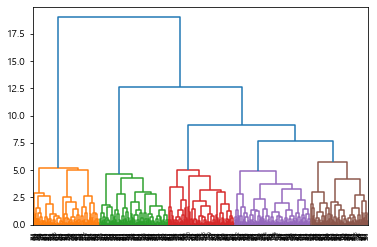

In [32]:
_ = dendrogram(linkage_matrix, color_threshold = 7)

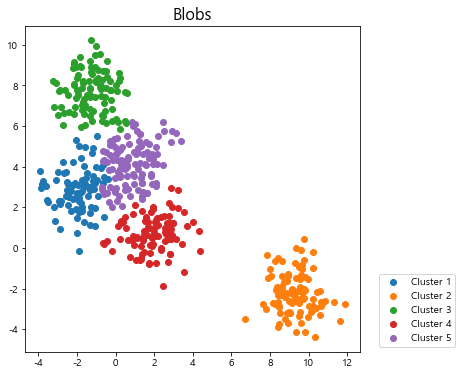

In [33]:
model = AgglomerativeClustering(
linkage = 'complete',
affinity = 'euclidean',
distance_threshold = 7,
n_clusters = None)
blobs_clusters = model.fit_predict(blobs_x)

plt.figure(figsize = (6, 6))

plt.title('Blobs', fontsize = 16)
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c,0], blobs_x[blobs_clusters == c,1], label = 'Cluster {}'.format(c+1))
plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))

In [34]:
# 모델 정의
model = AgglomerativeClustering(
linkage = 'complete',
affinity = 'euclidean',
distance_threshold = 2,
n_clusters = None)

# 학습
moons_clusters = model.fit_predict(moons_x)

In [36]:
moons_clusters

## 3개의 군집 형성 [0, 1, 2]

array([0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0,
       2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0,
       2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0,
       0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0,
       2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1,
       0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0,
       2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2,

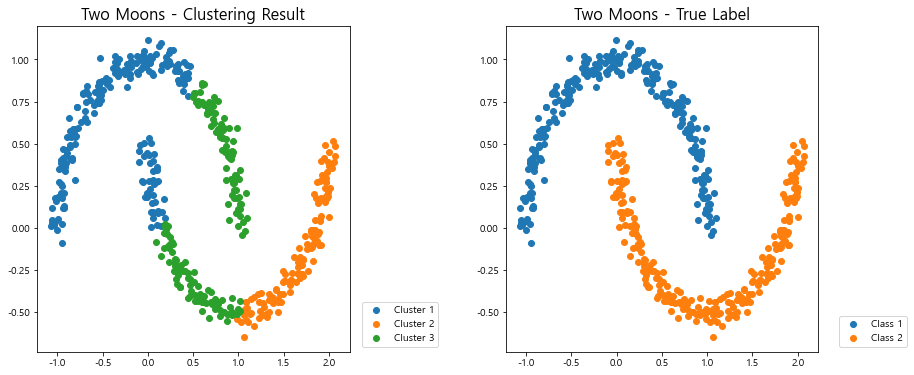

In [35]:
# 군집 형성 시각화
plt.figure(figsize = (14, 6))
plt.subplots_adjust(wspace = .5)

plt.subplot(1, 2, 1)
plt.title('Two Moons - Clustering Result', fontsize = 16)
for c in np.unique(moons_clusters):
    plt.scatter(moons_x[moons_clusters == c,0], moons_x[moons_clusters == c,1], label = 'Cluster {}'.format(c+1))
plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Two Moons - True Label', fontsize = 16)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c,0], moons_x[moons_y == c,1], label = 'Class {}'.format(c+1))
plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))
plt.show()

## 2.2.2 Linkage 변경하기

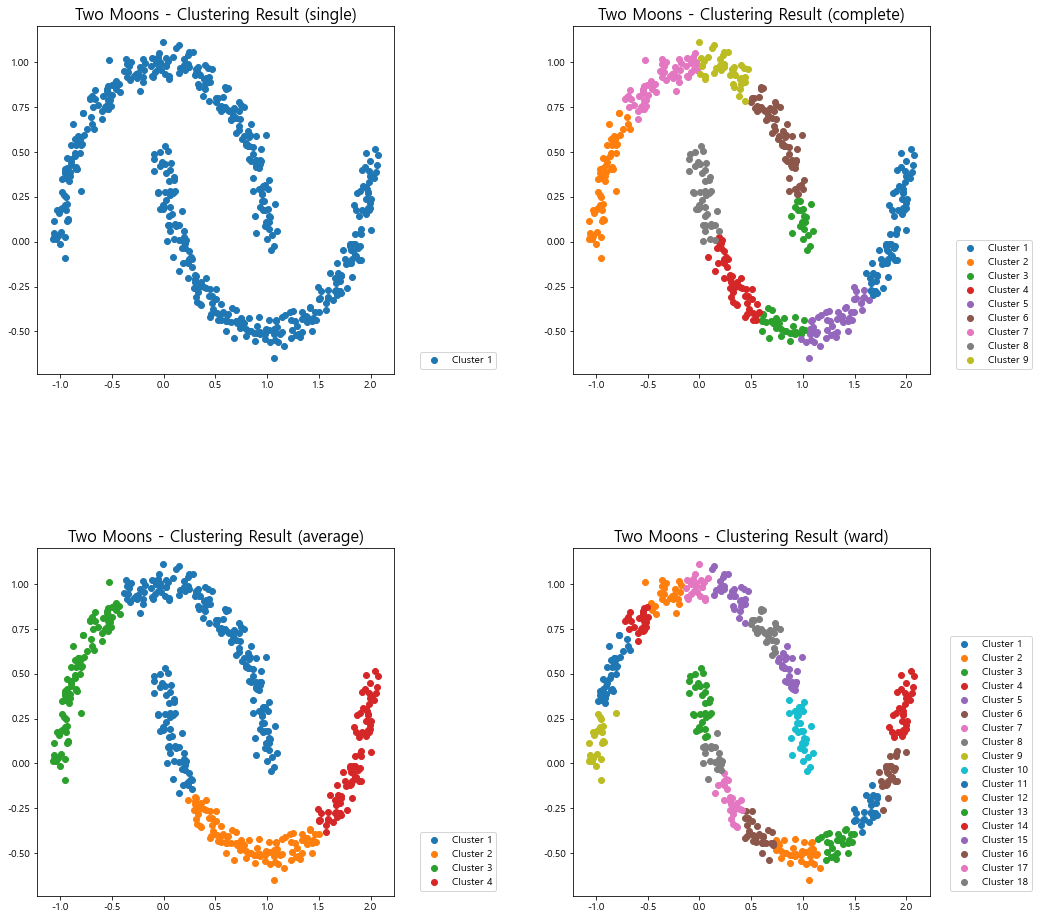

In [39]:
model = AgglomerativeClustering(
linkage = 'complete',
affinity = 'euclidean',
distance_threshold = 1,
n_clusters = None)

linkage_list = ['single', 'complete', 'average', 'ward']
cluster_results = {}
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(moons_x)
    cluster_results[_linkage] = _results
    
plt.figure(figsize = (16, 16))
plt.subplots_adjust(wspace = .5, hspace = .5)
for i, _linkage in enumerate(linkage_list):
    plt.subplot(2, 2, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_linkage), fontsize = 16)
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c,0], moons_x[_results == c,1], label = 'Cluster {}'.format(c+1))
    plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))
plt.show()

## 2.2.3 2개의 군집으로 고정 후 linkage 변경

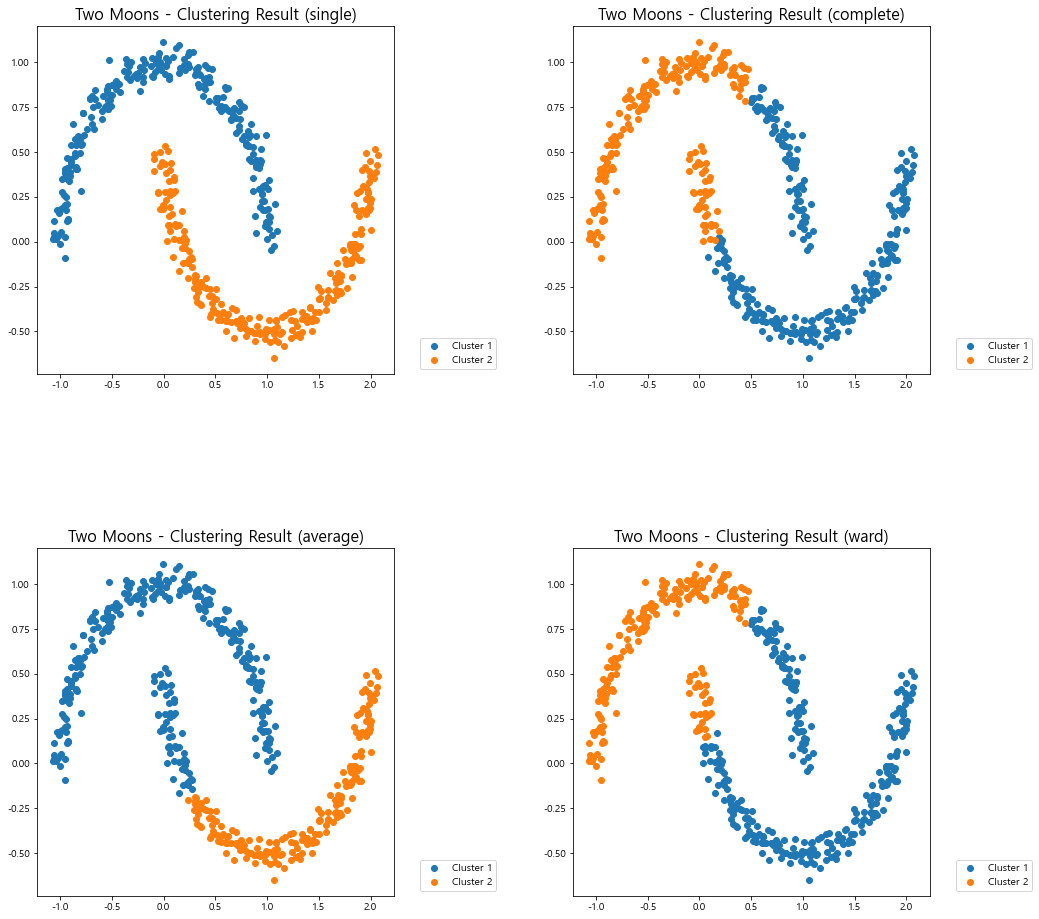

In [40]:
model = AgglomerativeClustering(
linkage = 'complete',
affinity = 'euclidean',
distance_threshold = None,
n_clusters = 2)

linkage_list = ['single', 'complete', 'average', 'ward']
cluster_results = {}
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(moons_x)
    cluster_results[_linkage] = _results
    
plt.figure(figsize = (16, 16))
plt.subplots_adjust(wspace = .5, hspace = .5)
for i, _linkage in enumerate(linkage_list):
    plt.subplot(2, 2, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_linkage), fontsize = 16)
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c,0], moons_x[_results == c,1], label = 'Cluster {}'.format(c+1))
    plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))
plt.show()

## 2.2.4 거리 종류 변경하기

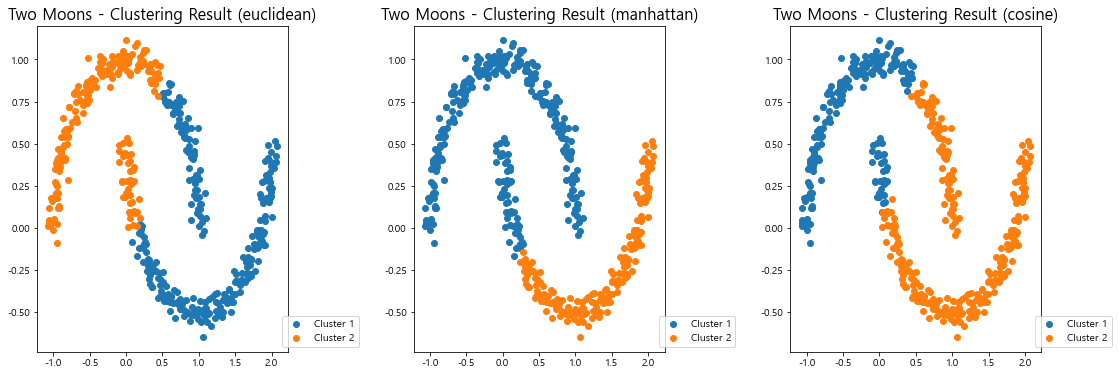

In [44]:
model = AgglomerativeClustering(
linkage = 'complete',
affinity = 'euclidean',
distance_threshold = None,
n_clusters = 2)

distance_list = ['euclidean', 'manhattan', 'cosine']
cluster_results = {}
for _distance in distance_list:
    model.affinity = _distance
    _results = model.fit_predict(moons_x)
    cluster_results[_distance] = _results
    
plt.figure(figsize = (18, 6))
plt.subplots_adjust(wspace = .5, hspace = .5)
for i, _distance in enumerate(distance_list):
    plt.subplot(1, 3, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_distance), fontsize = 16)
    _results = cluster_results[_distance]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c,0], moons_x[_results == c,1], label = 'Cluster {}'.format(c+1))
    plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))
plt.show()

# 2.3 K-평균 군집화 예제1 (Blobs)

## 2.3.1 K-Means Clustering Options

#### n_clusters
    - 

In [45]:
# 모델 정의
model = KMeans(
n_clusters = 5,
init = 'random',
n_init = 1,
random_state = 0)

# 학습
blobs_clusters = model.fit_predict(blobs_x)

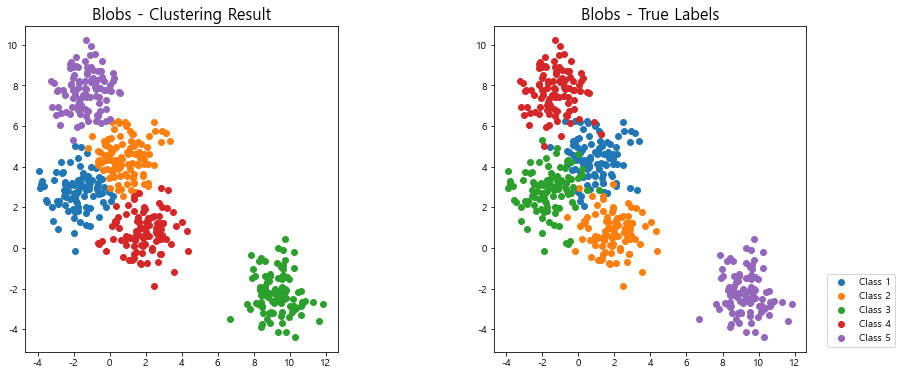

In [46]:
# 군집 형성 시각화
plt.figure(figsize = (14, 6))
plt.subplots_adjust(wspace=.5)

plt.subplot(1, 2, 1)
plt.title('Blobs - Clustering Result', fontsize = 16)
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c,0], blobs_x[blobs_clusters == c,1], label = 'Cluster {}'.format(c+1))
    
plt.subplot(1, 2, 2)
plt.title('Blobs - True Labels', fontsize = 16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0], blobs_x[blobs_y == c,1], label = 'Class {}'.format(c+1))
plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))

## 2.3.3 Random state 변경하여 학습 확인

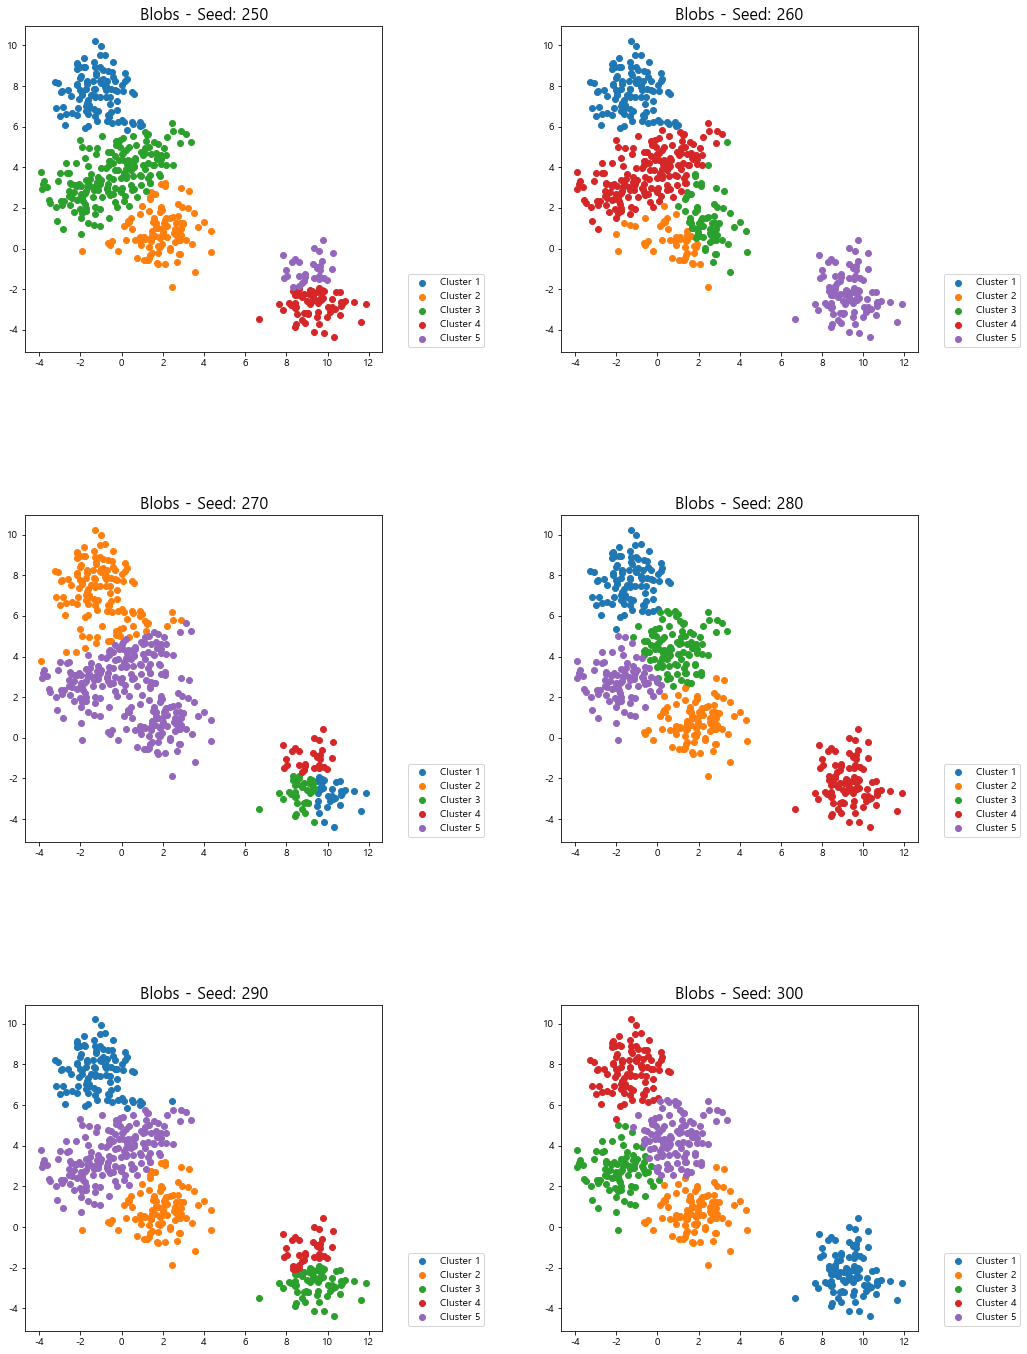

In [47]:
model = KMeans(
n_clusters = 5,
init = 'random',
n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results
    
plt.figure(figsize = (16, 24))
plt.subplots_adjust(wspace = .5, hspace = .5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed: {}'.format(_seed), fontsize = 16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c,0], blobs_x[_results == c,1], label = 'Cluster {}'.format(c+1))
    plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))
plt.show()

## 2.3.4 n_init 증가하면서 학습 확인

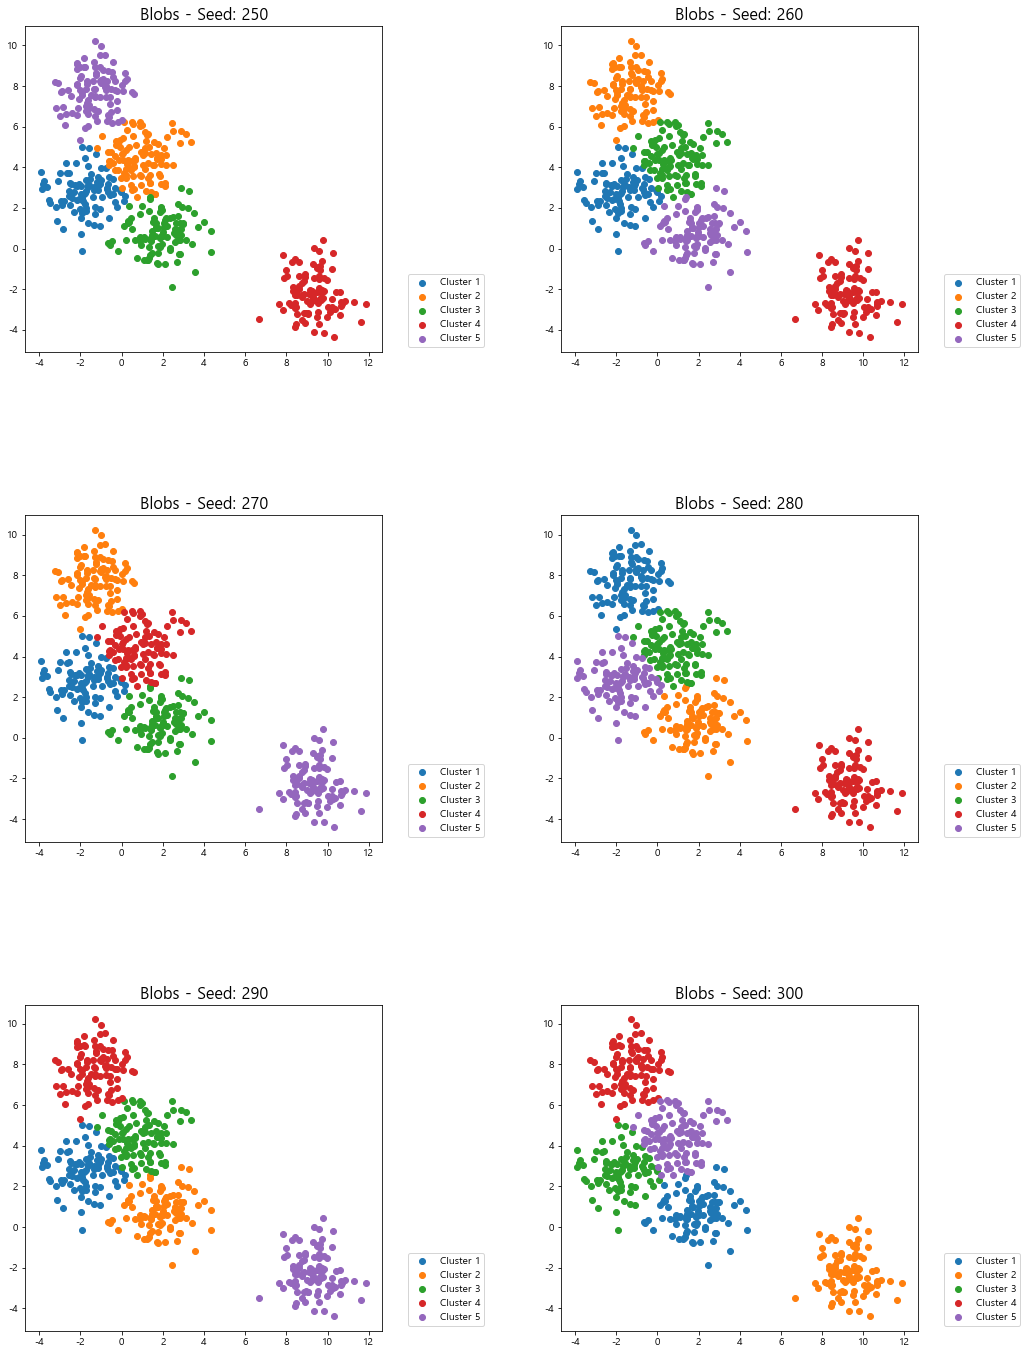

In [48]:
model = KMeans(
n_clusters = 5,
init = 'random',
n_init = 15)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results
    
plt.figure(figsize = (16, 24))
plt.subplots_adjust(wspace = .5, hspace = .5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed: {}'.format(_seed), fontsize = 16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c,0], blobs_x[_results == c,1], label = 'Cluster {}'.format(c+1))
    plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))
plt.show()

## 2.3.5 k-means++ 적용하고 결과 확인

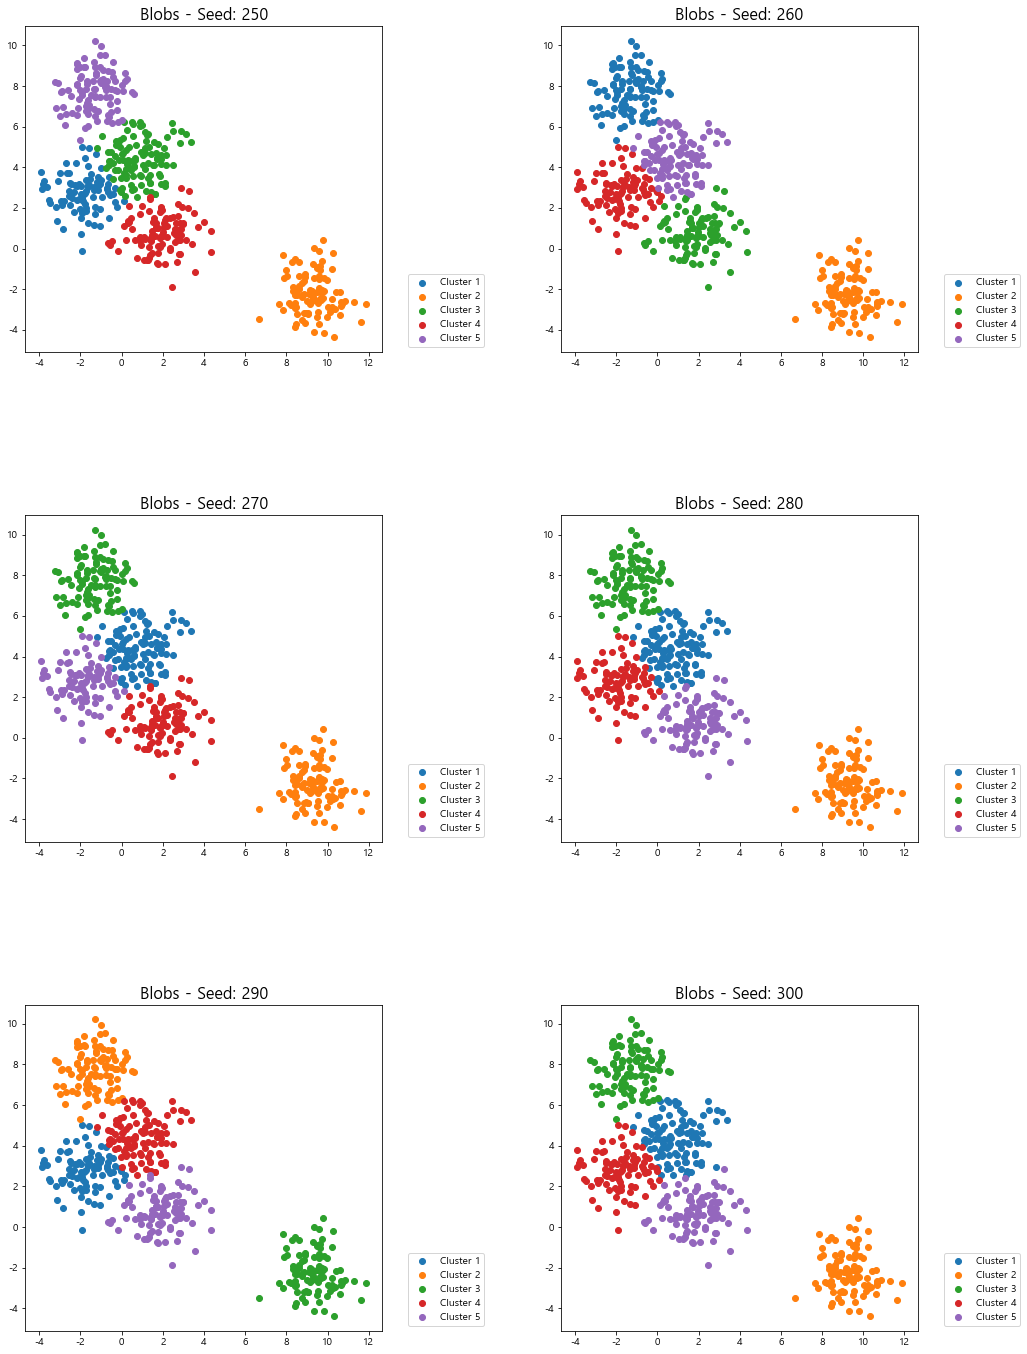

In [49]:
model = KMeans(
n_clusters = 5,
init = 'k-means++',
n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results
    
plt.figure(figsize = (16, 24))
plt.subplots_adjust(wspace = .5, hspace = .5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed: {}'.format(_seed), fontsize = 16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c,0], blobs_x[_results == c,1], label = 'Cluster {}'.format(c+1))
    plt.legend(loc = 4, bbox_to_anchor = (1.3, 0.0))
plt.show()